## Verbrannte Kalorien auf Basis Trainingsdauer einschätzen

In diesem Projekt möchten wir verbrannte Kalorien auf Basis von Trainingsdauer mittels linearer Regression berechnen.

Im ersten Schritt importieren wir einige Module:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

### Data

Für unser Projekt haben wir zwei csv-Dateien vorbereitet: `exercise.csv` und `calories.csv`  
Diese Dateien enthalten individuelle Informationen von anonymen Personen aus einem imaginären Fitnessstudio.  
Wir lesen die Inhalte dieser Dateien in unser Projekt ein und bilden damit einen Dataframe.

In [3]:
exercise_df = pd.read_csv("exercise.csv")
exercise_df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7


In [5]:
calories_df = pd.read_csv("calories.csv")
calories_df.head(3)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0


Jetzt bilden wir aus zwei Dataframes einen Dataframe, indem wir die beiden an einander anhängen:

In [18]:
df1 = pd.concat([exercise_df.set_index('User_ID'), calories_df.set_index('User_ID')], axis=1, join='inner')
df1.head(3)



,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


In [20]:
df2 = pd.concat([exercise_df, calories_df['Calories']], axis=1, join='inner')
df2.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


In [9]:
df = pd.merge(exercise_df, calories_df, on='User_ID', how='inner')
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


Einige allgmeine Informationen zum Dataframe:

In [24]:
df.shape

(15000, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [26]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Visualisierung
Um eine allgemeine Vorstellung vom Zusammenhang zwischen verbrannten Kalorien und der Trainingsdauer zu bekommen, visualisieren wir unseren Dataframe auf zwei Spalten `Duration` und `Calories`

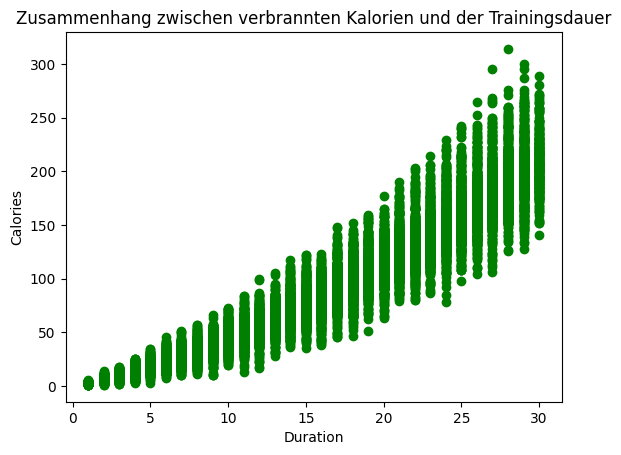

In [30]:
plt.scatter(x='Duration', y='Calories', data=df, color='green')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Zusammenhang zwischen verbrannten Kalorien und der Trainingsdauer')
plt.show()

In [32]:
df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0


<Axes: >

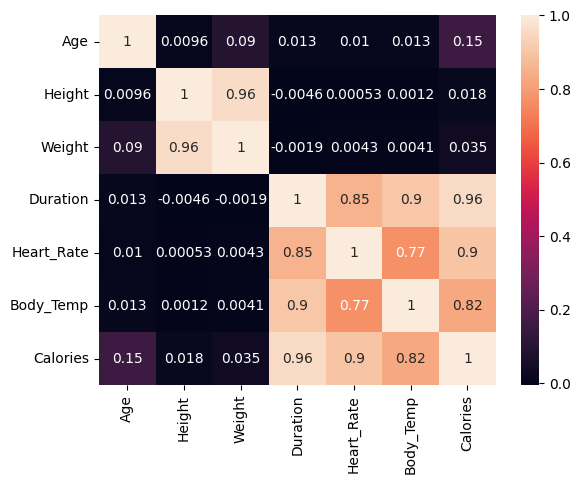

In [33]:
import seaborn as sns
df1=df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','Body_Temp', 'Calories']]
dfc=df1.corr()
sns.heatmap(dfc, annot=True)

### Einschätzung durch lineare Regression

In diesem Schritt möchten wir anhand lineare Regression die Menge der verbrannten Kalorien auf Basis der Trainingsdauer einschätzen.  

Dazu benötigen wir ein Modell.

**Erstelle ein lineares Modell**

In [31]:
model = LinearRegression()

In [35]:
df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0


**Test-Train-Split**   

Jetzt muss das Modell trainiert und getestet werden.
Teile den Dataframe in zwei Teilen ein, indem 75% der Daten zum Modelltraining und der Rest zum Testen benutzt werden.

In [38]:
X = df[['Duration','Heart_Rate','Body_Temp']] # wegen c_matrix
y = df['Calories'] 


In [39]:
X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y, 
                                                     test_size=0.25)

In [41]:
calorie=LinearRegression()

**Modell trainieren** 

Trainiere jetzt das Modell anhand Trainingset und ermittle `coef_` und `intercept_` -Attribute.

In [42]:
calorie.fit(X_train, y_train)

LinearRegression()

**Modell testen**

Teste das Modell anhand Testingset und ermittle die Genauigkeit des Modells.

In [43]:
calorie.score(X_test, y_test)

0.9454555653431329

**Eine Einschätzung machen**

Schätze anhand des trainierten Modells ein, wie viele Kalorien im Durchschnitt bei einem Aufenthalt von 60 Minuten in Fitnessstudio verbrannt werden können.

In [44]:
calorie.score(X_train, y_train)

0.9465176910436508

**Fazit**

In wiefern findest du dieses Modell für die Einschätzung sinnvoll? Reicht nur die Trainingsdauer als Feature aus, um eine qualitative Einschätzung zu liefern? Bitte ausführlich erläutern.

In [ ]:
#Diese Model ist gut ausführlich, da ich eine Correlatione Matrix erstellt
# und die Parameter gewählt habe, die in gerade Abhändigkeit von  Calorien sind. 
#Allerdings gibt es eine Lineare Regression, die wir auf die Visualisirung unten sehen können.

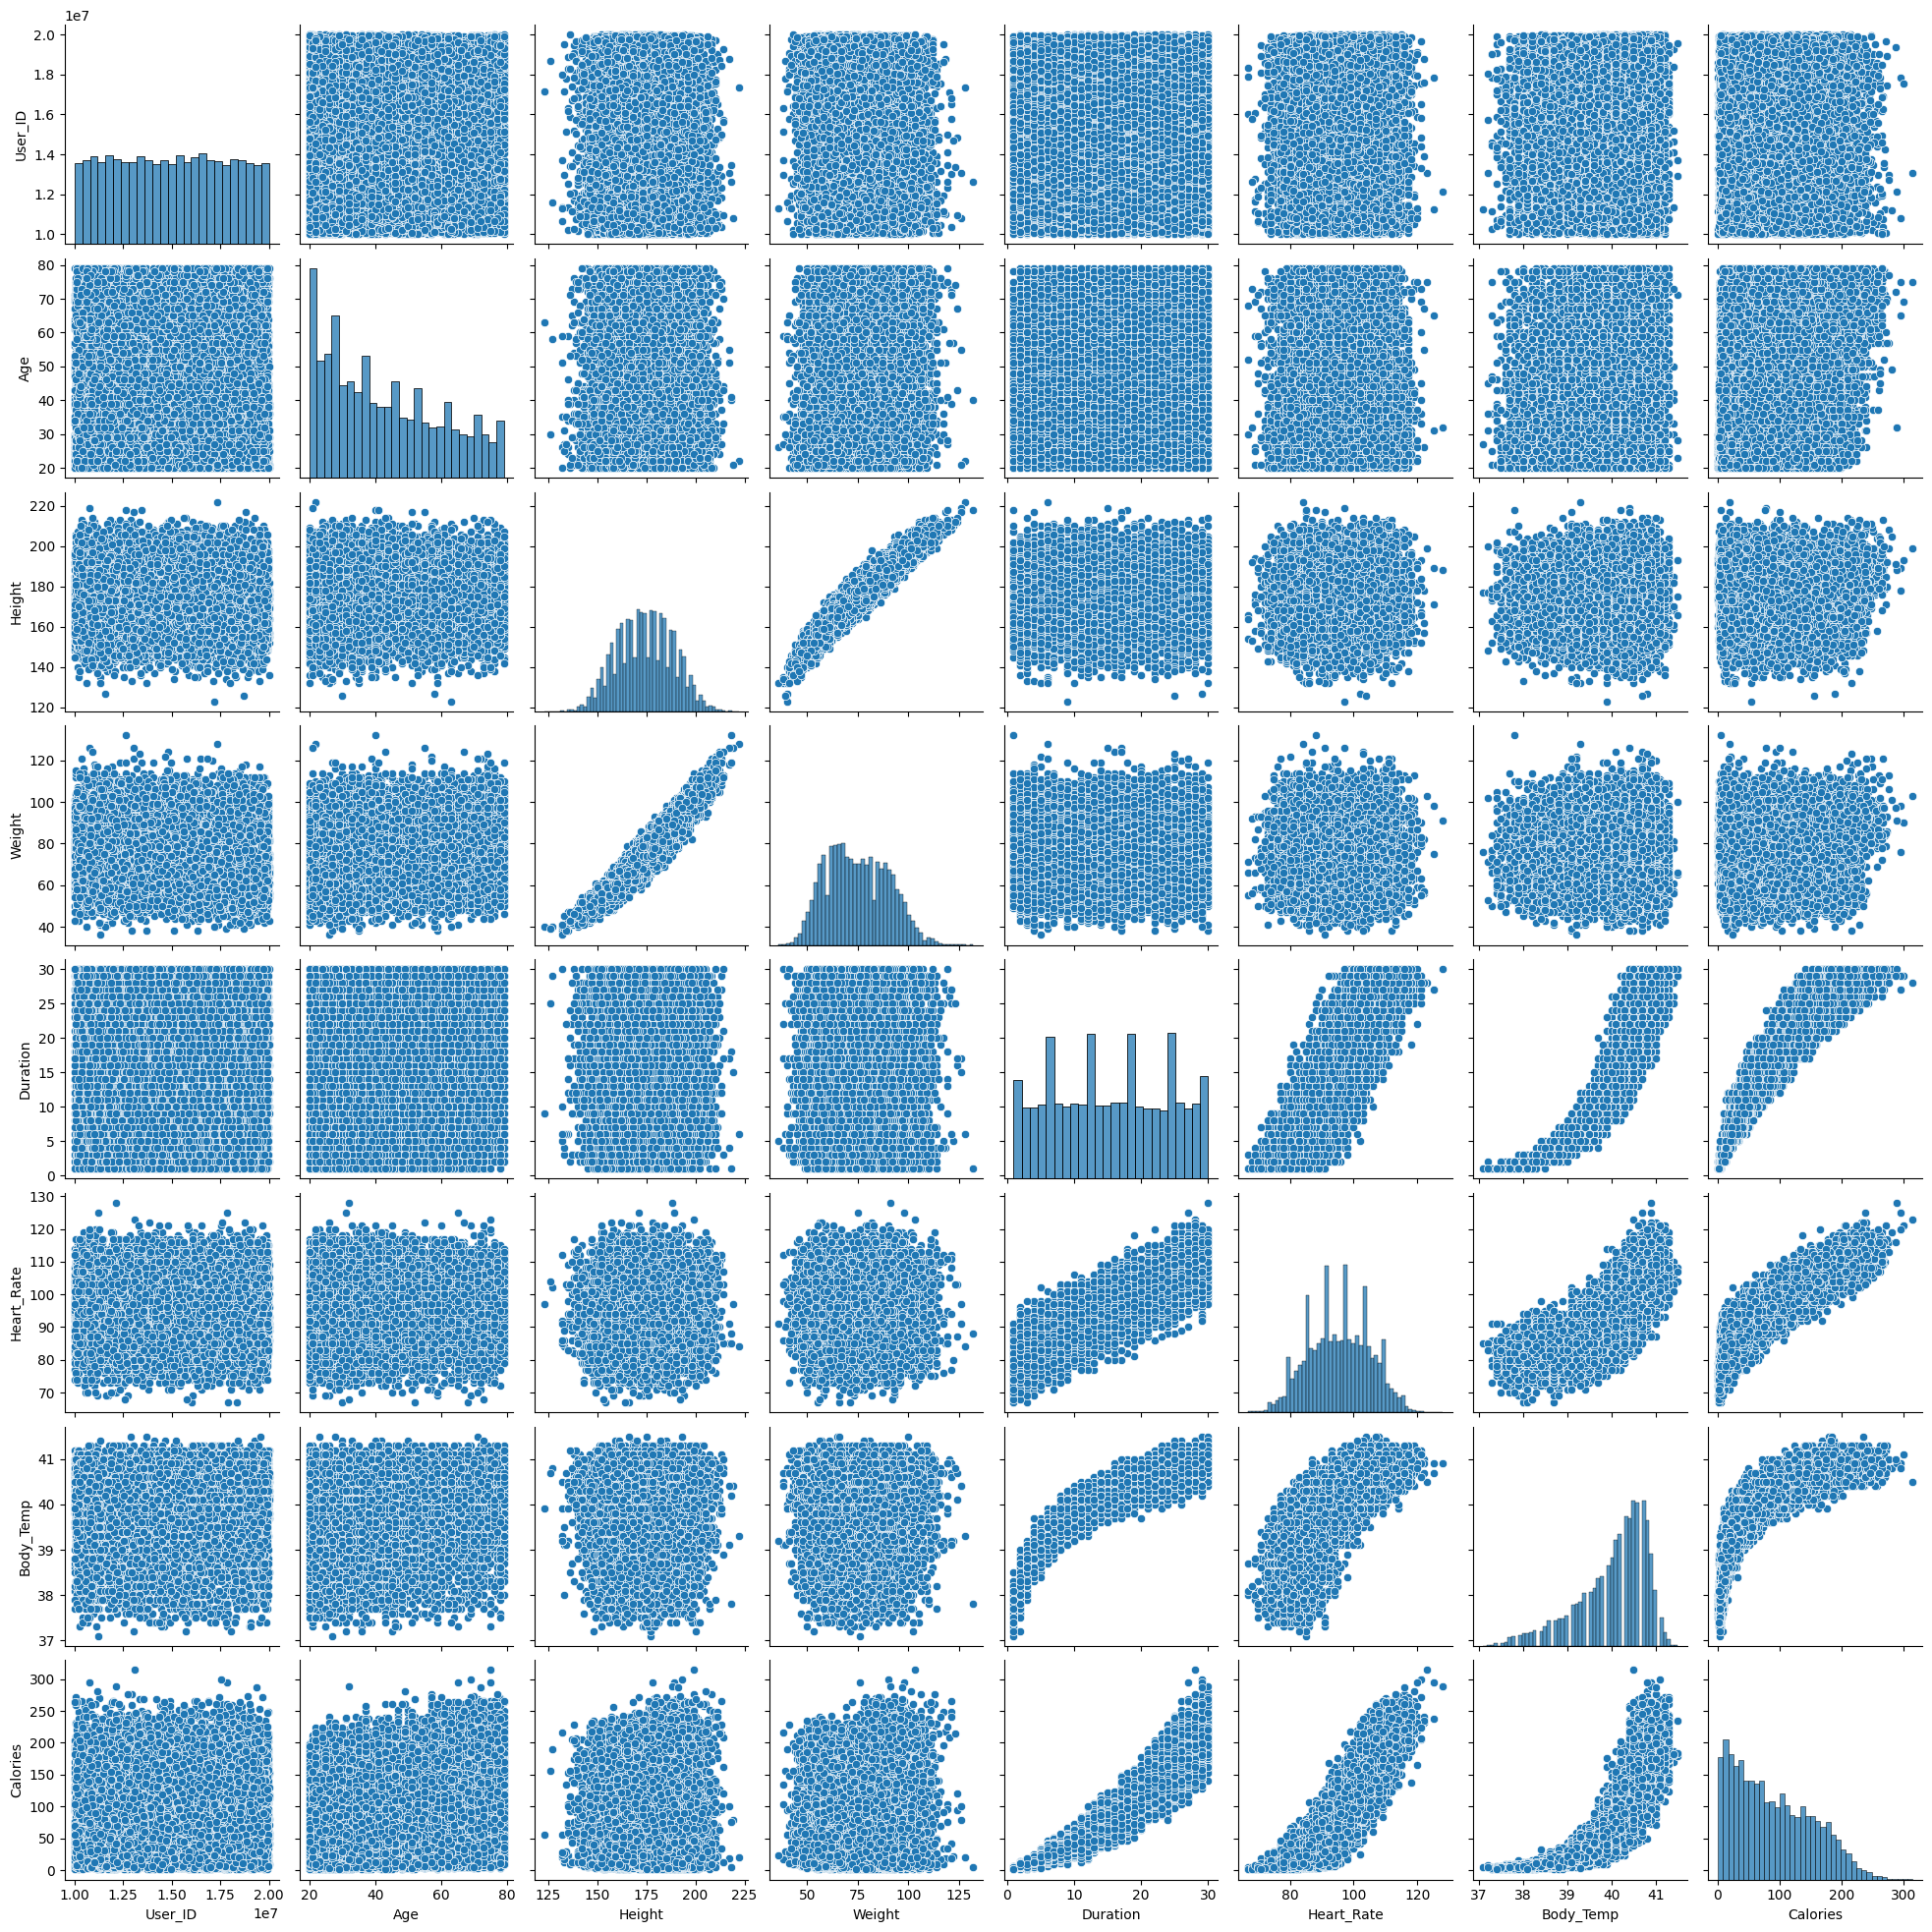

In [45]:
sns.pairplot(df)

Vielen Dank!